<a href="https://colab.research.google.com/github/dianasandrade2016/Colab/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de sobrevivência do Kaggle Titanic**

In [6]:
# carregar bibliotecas 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

#Algoritimos Machine Learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [7]:
#train.csv é usado para treinar o modelo.
dados = pd.read_csv('train.csv')

In [8]:
dados

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
dados.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#retirar dados desnecessários
dados = dados.drop(['Name','Ticket','Cabin','Embarked'],axis =1)

In [11]:
dados.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [12]:
# onde tiver os caracteres abaixo será inserido <NA>
dados.replace(['###!','####','','****','*****','NULL','null','87','**', ''], pd.NA, inplace=True)

In [13]:
dados.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [14]:
filtro=dados.Age.isnull()
dados.loc[filtro]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,6,0,3,male,NaN,0,0,8.4583
17,18,1,2,male,NaN,0,0,13.0000
19,20,1,3,female,NaN,0,0,7.2250
26,27,0,3,male,NaN,0,0,7.2250
28,29,1,3,female,NaN,0,0,7.8792
...,...,...,...,...,...,...,...,...
859,860,0,3,male,NaN,0,0,7.2292
863,864,0,3,female,NaN,8,2,69.5500
868,869,0,3,male,NaN,0,0,9.5000
878,879,0,3,male,NaN,0,0,7.8958


In [15]:
#Editando Chave e Variável Resposta
dados.set_index('PassengerId')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000
888,1,1,female,19.0,0,0,30.0000
889,0,3,female,NaN,1,2,23.4500


In [16]:
dados.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [17]:
dados.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# Número de homens e mulheres em cada classe de passageiros
dados.groupby(['Sex', 'Pclass'])['Sex'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


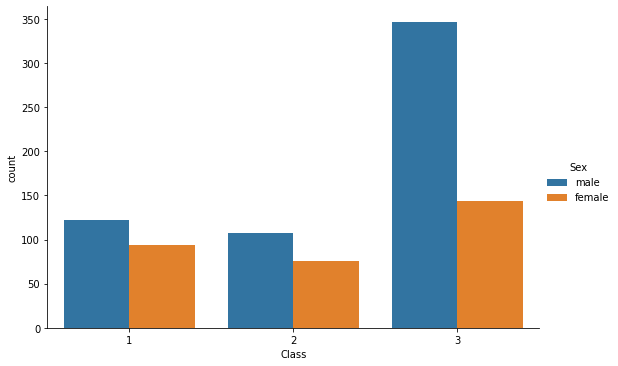

In [19]:
# agrupar por sexo e classe
g = sns.factorplot('Pclass', data=dados, hue='Sex', kind='count', aspect=1.5)
g.set_xlabels('Class')

In [20]:
# Número de passageiros que SOBREVIVERAM em cada classe agrupados por sexo.
# Total que SOBREVIVERAM para cada classe agrupada por sexo.
dados.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=np.sum, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


In [80]:
survived = dados[dados['Survived']==1]
#Número total de passageiros que sobreviveram
len(survived)

342

In [22]:
# Número de passageiros que NÃO SOBREVIVERAM em cada classe agrupados por sexo.
# Também foi encontrado total que NÃO SOBREVIVERAM para cada classe agrupada por sexo.
not_survived = dados[dados['Survived']==0]
not_survived.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=len, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,3,6,72,81
male,77,91,300,468
All,80,97,372,549


In [23]:
survived = dados[dados['Survived']==0]
#Número total de passageiros que não sobreviveram
len(not_survived)

549

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


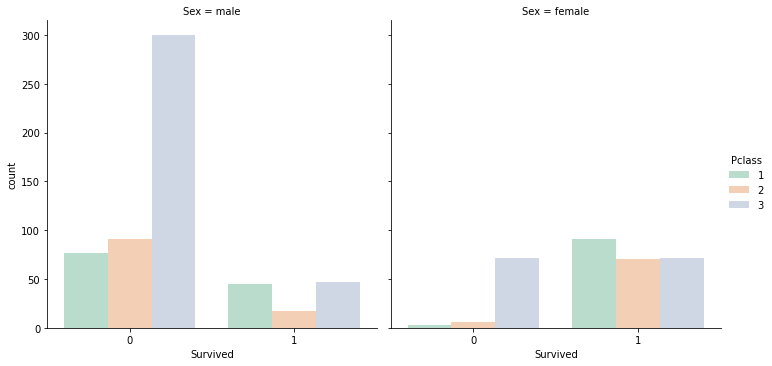

In [24]:
## Número de passageiros que SOBREVIVERAM e NÂO SOBREVIVERAM em cada classe agrupados por sexo.
sns.factorplot('Survived', data=dados, hue='Pclass', kind='count', palette='Pastel2', hue_order=range(1,4), col='Sex')

In [25]:
dados.describe(include=['O'])

,Sex
count,891
unique,2
top,male
freq,577


In [26]:
dados.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


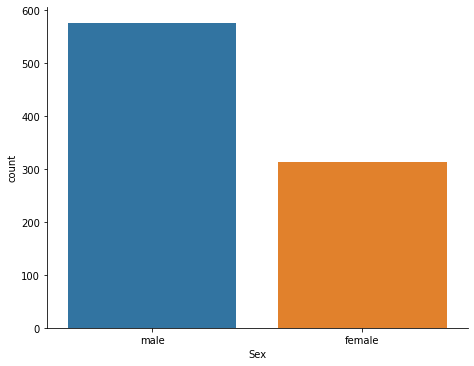

In [27]:
sns.factorplot('Sex', data=dados, kind='count', aspect=1.3)

In [28]:
#Número de homens e mulheres que não sobreviveram e os que sobreviveram por sexo
dados.groupby(['Sex', 'Survived'])['Sex'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição de passageiros por Idade')

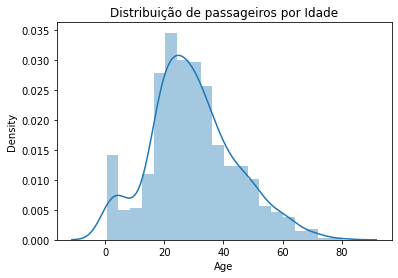

In [29]:
#Elimine os valores ausentes para os registros nos quais o passageiro da idade está ausente
age = dados['Age'].dropna()
# Distribuição de idade, com uma sobreposição de um gráfico de densidade
age_dist = sns.distplot(age)
age_dist.set_title("Distribuição de passageiros por Idade")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Male')

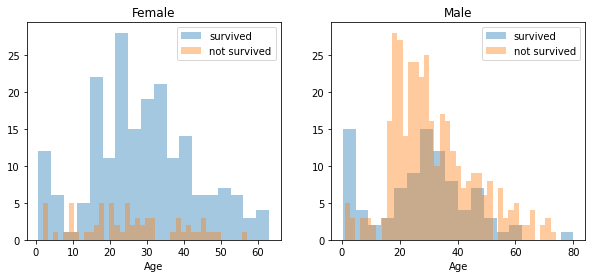

In [30]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = dados[dados['Sex']=='female']
men = dados[dados['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

In [31]:
# probabilidade de sobrevivência alta para homens entre 18 a 30 anos
# probabilidade de sobrevivência para mulheres entre 14 a 40 anos
# probabilidade de sobrevivência muito baixa para crianças de 5 a 18 anos
# probabilidade de sobrevivência um pouco maior  para bebês

# ***Transformação de Dados***

In [32]:
dados['Sex F'] = np.where(dados['Sex'] == 'female', 1, 0) 
dados['Pclass_1'] = np.where(dados['Pclass'] == 1, 1, 0) 
dados['Pclass_2'] = np.where(dados['Pclass'] == 2, 1, 0) 
dados['Pclass_3'] = np.where(dados['Pclass'] == 3, 1, 0) 

In [33]:
dados.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex F,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,male,22.0,1,0,7.2500,0,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,1,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,1,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,1,1,0,0
4,5,0,3,male,35.0,0,0,8.0500,0,0,0,1


In [34]:
dados = dados.drop(['Pclass','Sex'], axis = 1) 

In [35]:
dados.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex F,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,1
3,4,1,35.0,1,0,53.1000,1,1,0,0
4,5,0,35.0,0,0,8.0500,0,0,0,1


In [36]:
dados.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [37]:
# número conhecido de valores missings
dados.isnull().sum()

PassengerId      0
Survived         0
Age            177
SibSp            0
Parch            0
Fare             0
Sex F            0
Pclass_1         0
Pclass_2         0
Pclass_3         0
dtype: int64

In [38]:
# onde tem <NAN> é inserido 0
dados.fillna(0, inplace=True)

In [39]:
# número conhecido de valores missings
dados.isnull().sum()

PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
Sex F          0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64

# Amostragem

In [40]:
#70% para treinar e 30% para testar
x_train, x_test, y_train, y_test = train_test_split(dados.drop(['Survived'],axis=1), dados['Survived'],test_size = 0.3,random_state = 1234)


In [41]:
[{'treino':x_train.shape}, {'teste':x_test.shape}]

[{'treino': (623, 9)}, {'teste': (268, 9)}]

# Modelo

In [42]:
rmdforest = RandomForestClassifier(n_estimators=1000, criterion='gini',max_depth=5)
rmdforest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
probabilidade = rmdforest.predict_proba(dados.drop('Survived',axis=1))[:,1]
classificacao = rmdforest.predict(dados.drop('Survived',axis=1))

In [44]:
dados['probabilidade'] = probabilidade
dados['classificacao'] = classificacao

In [45]:
# probabilidade de sobrevivência alta para homens entre 18 a 30 anos
# probabilidade de sobrevivência para mulheres entre 14 a 40 anos
# probabilidade de sobrevivência muito baixa para crianças de 5 a 18 anos
# probabilidade de sobrevivência um pouco maior para bebês
dados

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex F,Pclass_1,Pclass_2,Pclass_3,probabilidade,classificacao
0,1,0,22.0,1,0,7.2500,0,0,0,1,0.117459,0
1,2,1,38.0,1,0,71.2833,1,1,0,0,0.924116,1
2,3,1,26.0,0,0,7.9250,1,0,0,1,0.565049,1
3,4,1,35.0,1,0,53.1000,1,1,0,0,0.912236,1
4,5,0,35.0,0,0,8.0500,0,0,0,1,0.143978,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,0,1,0,0.131857,0
887,888,1,19.0,0,0,30.0000,1,1,0,0,0.897897,1
888,889,0,0.0,1,2,23.4500,1,0,0,1,0.464204,0
889,890,1,26.0,0,0,30.0000,0,1,0,0,0.544977,1


In [46]:
dados.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex F,Pclass_1,Pclass_2,Pclass_3,probabilidade,classificacao
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,23.799293,0.523008,0.381594,32.204208,0.352413,0.242424,0.206510,0.551066,0.384673,0.299663
std,257.353842,0.486592,17.596074,1.102743,0.806057,49.693429,0.477990,0.428790,0.405028,0.497665,0.291097,0.458368
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.077846,0.000000
25%,223.500000,0.000000,6.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.137177,0.000000
50%,446.000000,0.000000,24.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,1.000000,0.272216,0.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.558068,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,0.975514,1.000000


In [47]:
dados.to_csv("df_titanic_novo.csv", index=False)

# Criação dos Modelos de Machine Learning

In [72]:
from sklearn.tree import DecisionTreeRegressor
#criar um estimador, opcionalmente especificar parâmetros
model = DecisionTreeRegressor()
#estimar aos dados
model.fit(x_train, y_train)
#aplicar o modelo aos dados de teste e treinamento
predicted_test_y = model.predict(x_test)
predicted_train_y = model.predict(x_train)

acc_decision_tree = round(model.score(x_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")


100.0 %


In [49]:
def scatter_y(true_y, predicted_y):
       
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(true_y, predicted_y, '.k')
    
    ax.plot([0, 30], [0, 30], '--k')
    ax.plot([0, 30], [2, 32], ':k')
    ax.plot([2, 32], [0, 30], ':k')
    
    rms = (true_y - predicted_y).std()
    
    ax.text(25, 3,"Erro da média da raiz quadrada  = %.2g" % rms, ha='right', va='bottom')
  
    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    
    ax.set_xlabel('Número verdadeiro de sobreviventes')
    ax.set_ylabel('Número previsto de sobreviventes')
    
    return rms

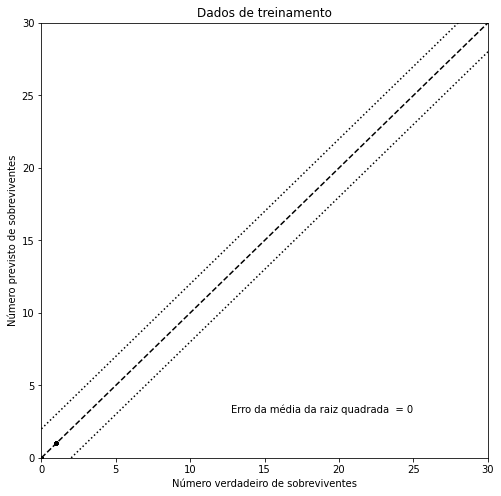

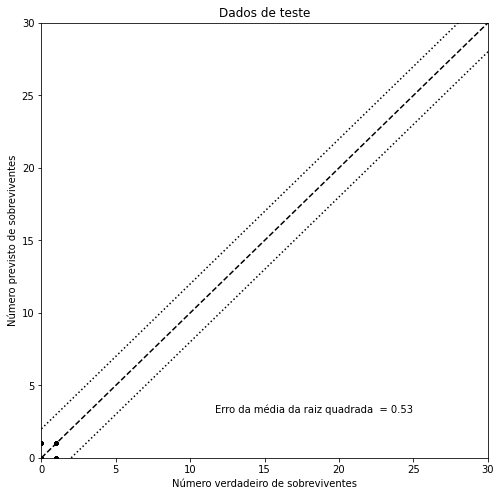

In [50]:
scatter_y(y_train, predicted_train_y)
plt.title("Dados de treinamento")
scatter_y(y_test, predicted_test_y)
plt.title("Dados de teste");

In [76]:
X_train = dados.drop("Survived", axis=1)
Y_train = dados["Survived"]
X_test  = dados.drop("PassengerId", axis=1).copy()

In [52]:
# Aprendizagem Gradiente Descendente Estocástico (SGD)
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print(round(acc_sgd,2,), "%")

62.74 %


In [77]:
# Floresta Aleatória
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [78]:
# Regressão Logística
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

87.09 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
# algoritmo k-vizinhos mais próximos (K-NN)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

78.0 %


In [56]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

86.2 %


In [57]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

65.54 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [58]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

85.3 %


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [59]:
# Árvore de Decisão
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

100.0 %


***Qual é o melhor modelo ?***

In [60]:
results = pd.DataFrame({
    'Model': ['Decision Tree Regressor','Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_decision_tree, acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Decision Tree Regressor
100.00,Random Forest
100.00,Decision Tree
87.09,Logistic Regression
86.20,Naive Bayes
85.30,Support Vector Machines
78.00,KNN
65.54,Perceptron
62.74,Stochastic Gradient Decent


# Random Forest

In [83]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

In [84]:
#Resultado mais real a precisão média de 87% com um desvio padrão de 4%(a precisão pode diferir mais ou menos 4%)
print("Score:", scores)
print("Média:", scores.mean())
print("Desvio Padrão:", scores.std())

Score: [0.85555556 0.87640449 0.75280899 0.8988764  0.92134831 0.86516854
 0.87640449 0.86516854 0.92134831 0.87640449]
Média: 0.8709488139825219
Desvio Padrão: 0.04495581924719983


# Avaliação adicional

***Matriz de Confusão***

In [63]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[504,  45],
       [ 77, 265]])

In [64]:
#510 não sobreviventes (verdadeiros negativos)
#39 não sobreviventes (falsos negativos).
#90 sobreviventes (falsos positivos) 
#252 sobreviventes (positivos verdadeiros).

***Precisão e Recall***

In [65]:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8548387096774194
Recall: 0.7748538011695907


***F-Score***

In [66]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.8128834355828222